<a href="https://colab.research.google.com/github/joaoantoniopc/pipeline/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue> Pipeline do



1.   Entendimento do Problema de Negócio
2.   Análise Exploratória de Dados
3.   Processamento dos Dados
4.   Análise Exploratória de Dados
5.   Análise Exploratória de Dados








## ![](https://miro.medium.com/v2/resize:fit:679/0*Yb_BsikIKFAtuKj9.gif)



#1° Entendimento do Problema de Negócio




    1. Fontes de Dados Simuladas: Crie duas fontes de dados simuladas em formato CSV: uma representando dados de vendas (com campos como data, produto, valor) e outra representando dados de clientes (com campos como ID, nome, email).

    2. Transformação de Dados: Desenvolva um processo de transformação de dados usando a linguagem de programação de sua escolha (por exemplo, Python ou SQL) para combinar os dados de vendas e clientes com base no ID do cliente. O resultado deve ser uma tabela consolidada com informações relevantes para análise.

    3. Data Warehouse Simulado: Modele um esquema simples para um Data Warehouse que possa acomodar os dados consolidados. Pode ser um esquema estrela básico com tabelas de fatos e dimensões.

    4. Carga no Data Warehouse: Crie um script ou processo para carregar os dados consolidados na estrutura do Data Warehouse simulado.

    5. Visualização de Dados: Use uma ferramenta de visualização de dados de sua escolha (por exemplo, Power BI, Tableau ou outra) para criar um painel simples que apresente informações sobre as vendas. Você pode incluir gráficos de vendas por período, produto mais vendido etc.

#2° Fontes de Dados Simuladas e transformações

Em anexo consta os arquivos sql criados para extração dos cliente onde já foram realizadas as transformações de normalização de dados(extract_cliente.sql) e extração das vendas(extract_vendas.sql).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2° Análise Exploratória dos Dados

Neste passo foi realizado merge dos arquivos e removido campos duplicados.

Instalacao das bibliotecas

In [5]:
!pip install pandas   gdown
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import io
import sweetviz as sv
import gdown

# Lendo os DataFrames com o delimitador correto (vírgula) e indicando que a primeira linha contém cabeçalhos

# Carregando os dados do arquivo CSV 'clientes.csv' em clientes_df
clientes_df = pd.read_csv("clientes.csv",  header=0, encoding='utf-8')

# Carregando os dados do arquivo CSV 'vendas.csv' em vendas_df
vendas_df = pd.read_csv("vendas.csv",  header=0, encoding='utf-8')

# Realizando a junção dos DataFrames pelos campos "id do cliente"
resultado_df = pd.merge(clientes_df, vendas_df, on="id")

# Removendo colunas duplicadas após o merge
resultado_df = resultado_df.loc[:, ~resultado_df.columns.duplicated()]

# Realizando a análise com Sweetviz no DataFrame resultado_df
resultado = sv.analyze(resultado_df)

# Gerando um relatório HTML chamado 'SWEETVIZ_REPORT.html'
resultado.show_html('SWEETVIZ_REPORT.html')

> Neste momento foi gerado o arquivo de análise exploratória dos dados: SWEETVIZ_REPORT.html. Este arquivo serve para para uma análise inicial dos dados que vamos trabalhar durante a pipeline.

# 3° Processamento de Dados

### Importação das bibliotecas

In [ ]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Bibliotecas de IA - Machine Learning e Automações
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

#4° Construção do Data Warehouse

Segue:
1- Em anexo slq da criação do Data Warehouse;
2- Abaixo figura das tabelas criadas no banco de dados postgre.

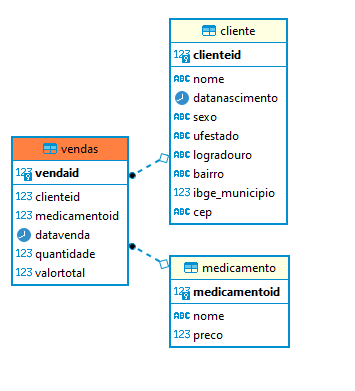